# Bank data analysis

The goal of your project is to create a robust classifier and use the data, where you will build a model that will recognize whether specific client will leave/unsubscribe the bank services.
Make feature engineering but also try differnet models in order to get as much accuracy as possible.




    

# Working Plan



1. Phase 1 : Dataset
    * Team Planning
    * Full git project Integration
    * General Project Research
    * Dataset Preparation
    * Dataset Feature Engineering

2. Phase 2 : Training
    * Make Research about your model
    * Compose your model (try different models) 
    * Ping Pong phase with Dataset feature engineers
    * Generate more data if needed
    * Fine tunning of your model

3. Phase 3 : Deployment
    * Perform benchmark (precision/recall), ROC curve
    * Model Deploy (Git)
    * Write git Readme.md file
    * Receive Feedback from PM

## 0. Read data, visualize, basic statistics, understand it

In [1]:
# Import Pandas,Numpy and sklearn package
import pandas as pd
import sklearn
import numpy as np

In [2]:
#pip install seaborn
import seaborn as sns
print(sns.__version__)

0.11.0


In [3]:
# sklearn libraries
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef,classification_report,roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [4]:
# Visual libraries
from matplotlib import pyplot as plt


In [5]:
# Import Bank Dataset 
dataset = pd.read_csv("dataset_bank.csv")
dataset.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39.0,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44.0,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36.0,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34.0,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21.0,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


## 1. Data preprocessing, normalization, missing data, categorical data

### Check for missing values

In [6]:
dataset.info()
dataset.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  float64
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

(10127, 21)

In [8]:
dataset.nunique()

Attrition_Flag                 2
Customer_Age                  45
Gender                         2
Dependent_count                6
Education_Level                7
Marital_Status                 4
Income_Category                6
Card_Category                  4
Months_on_book                47
Total_Relationship_Count       6
Months_Inactive_12_mon         7
Contacts_Count_12_mon          7
Credit_Limit                6205
Total_Revolving_Bal         1974
Avg_Open_To_Buy             6813
Total_Amt_Chng_Q4_Q1        1158
Total_Trans_Amt             5033
Total_Trans_Ct               126
Total_Ct_Chng_Q4_Q1          830
Avg_Utilization_Ratio        964
dtype: int64

In [9]:
dataset.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,3.742297e+07,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,3.193385e+09,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,-2.147484e+09,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,3.100000e+01,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,3.600000e+01,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,4.000000e+01,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,3.210000e+11,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [7]:
# Drop the column CLIENTNUM                   
dataset = dataset.drop(["CLIENTNUM"], axis = 1)

### Identifying Outliers with Interquartile Range (IQR)

In [10]:
# Check for 'Months_on_book' column
# The first line of code below prints the skewness value for the 'Months_on_book'
# while the second line prints the summary statistics.

print(dataset['Months_on_book'].skew())
dataset['Months_on_book'].describe()

100.29059631376872


count    1.012700e+04
mean     3.742297e+07
std      3.193385e+09
min     -2.147484e+09
25%      3.100000e+01
50%      3.600000e+01
75%      4.000000e+01
max      3.210000e+11
Name: Months_on_book, dtype: float64

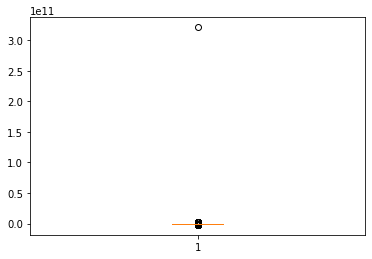

<AxesSubplot:>

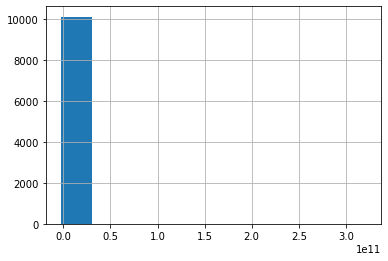

In [11]:
#Identifying Outliers with Visualization

plt.boxplot(dataset["Months_on_book"])
plt.show() 
dataset.Months_on_book.hist()

#The above chart shows that the distribution is right-skewed, 
#and there are extreme higher values at the right of the histogram.

In [12]:
# it is obiviously that 'Months_on_book' feauture has outliers as it is min. value =-2.147484e+09 and max. value =3.210000e+11
#The interquartile range (IQR) is a measure of statistical dispersion and is calculated as the difference between 
# the 75th and 25th percentiles. It is represented by the formula IQR = Q3 − Q1

Q1 = dataset['Months_on_book'].quantile(0.25)
Q3 = dataset['Months_on_book'].quantile(0.75)
IQR = Q3 - Q1

print('The interquartile range (IQR):',IQR)

The interquartile range (IQR): 9.0


### Outlier Treatment

In [13]:
# The 50th percentile value (or the median) and the second 95th percentile value.

print('The line below print the 5% value and the second line presents a 99% value.')
print("The range between min and max values without outliers is from", 
      dataset['Months_on_book'].quantile(0.002),'up to', dataset['Months_on_book'].quantile(0.99))

print('\nThe line below print the 50% value (or the median) and the second line presents a 95% value.')
print("The most common values are between:", 
      dataset['Months_on_book'].quantile(0.50),'and', dataset['Months_on_book'].quantile(0.95))


The line below print the 5% value and the second line presents a 99% value.
The range between min and max values without outliers is from 13.0 up to 56.0

The line below print the 50% value (or the median) and the second line presents a 95% value.
The most common values are between: 36.0 and 50.0


In [14]:
# Replacing Outliers (the extreme values) with median values. 
# It is advised to not use mean values as they are affected by outliers.

dataset['Months_on_book'] = np.where(dataset['Months_on_book'] > 56, 36, dataset['Months_on_book'])
dataset['Months_on_book'] = np.where(dataset['Months_on_book'] < 13, 36, dataset['Months_on_book'])
print('New skewness value =', dataset['Months_on_book'].skew())

dataset.describe()

New skewness value = -0.10693284673560063


,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.929397,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986301,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [15]:
# Check variable data types

from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

print("Numeric columns:\n")
for column in dataset.columns:
    if is_numeric_dtype(dataset[column]):
        print(column)
print("----------------------------------\n")        
print("Categorical columns:\n ")        
for column in dataset.columns:
    if is_string_dtype(dataset[column]):
        print(column)

Numeric columns:

Customer_Age
Dependent_count
Months_on_book
Total_Relationship_Count
Months_Inactive_12_mon
Contacts_Count_12_mon
Credit_Limit
Total_Revolving_Bal
Avg_Open_To_Buy
Total_Amt_Chng_Q4_Q1
Total_Trans_Amt
Total_Trans_Ct
Total_Ct_Chng_Q4_Q1
Avg_Utilization_Ratio
----------------------------------

Categorical columns:
 
Attrition_Flag
Gender
Education_Level
Marital_Status
Income_Category
Card_Category


In [16]:
categorical_columns = [x for x in dataset.dtypes.index if dataset.dtypes[x]=='object']
numeric_columns=[x for x in dataset.dtypes.index if is_numeric_dtype(dataset[x])]

print ('Categorical columns:\n',categorical_columns)
print('\nNumerical columns=\n',numeric_columns)

Categorical columns:
 ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

Numerical columns=
 ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']


In [ ]:
for col in dataset.columns:
    print ('\nFrequency of Categories for varible %s'%col)
    print (dataset[col].value_counts())

#### SMOTE-Unbalanced dataset

C:\Users\Vlatko\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Vlatko\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Vlatko\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

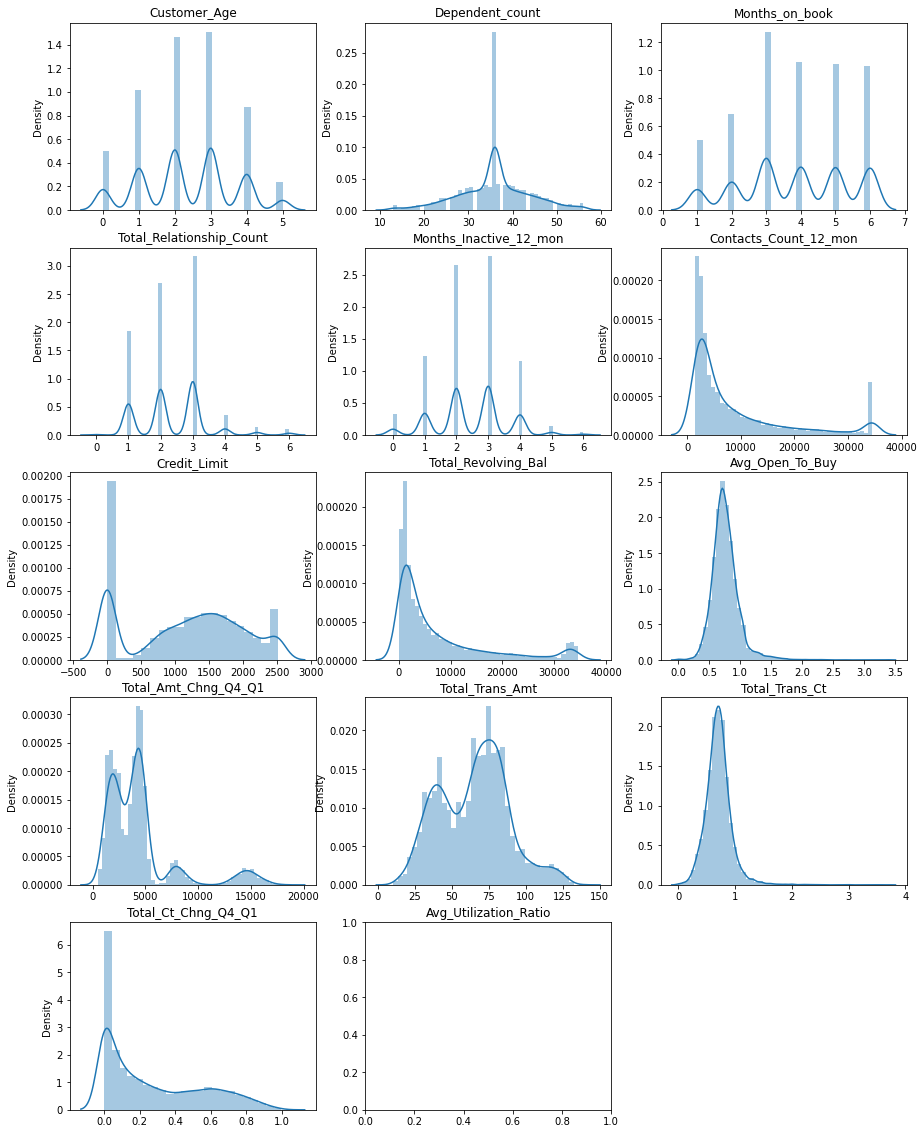

In [18]:
%matplotlib inline

# print (categorical_columns)
# print(numeric_columns)
rows = 5
columns = 3
figure = plt.figure(figsize=(15,20))
for idx, col in enumerate(numeric_columns, start=1):
   col_values = [dataset[col].values]
   plt_seaborn = sns.distplot(col_values)
   cell = plt.subplot(5, 3, idx)
   plt_seaborn.plot()
   plt.title(col)

Text(0, 0.5, 'Frequency')

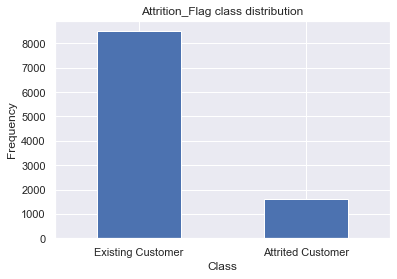

In [23]:
# class  Frequency

sns.set(style="darkgrid")
labels = ['Existing Customer','Attrited Customer']
classes = pd.value_counts(dataset['Attrition_Flag'], sort = True)
classes.plot(kind = 'bar', rot=0)

plt.title("Attrition_Flag class distribution")
plt.xticks(range(2), labels)
plt.xlabel("Class")
plt.ylabel("Frequency")

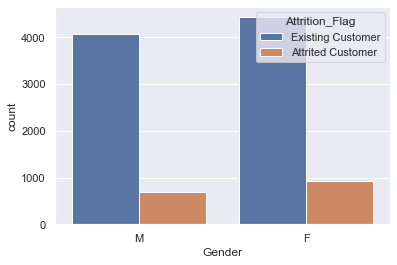

In [35]:

sns.set(style="darkgrid")
ax = sns.countplot(x="Gender", hue="Attrition_Flag", data=dataset)
plt.show()
#Female has a higher proportion of attrition compared to males.

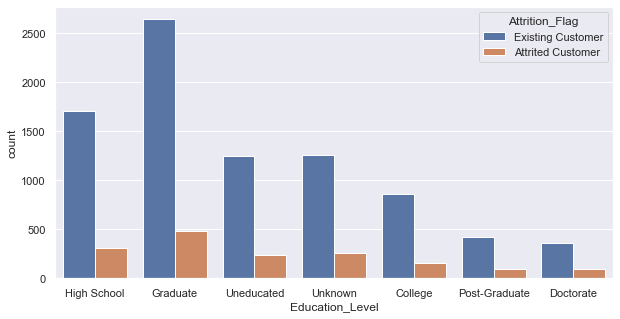

In [34]:

sns.set(style="darkgrid")
plt.figure(figsize=(10,5))
ax = sns.countplot(x="Education_Level", hue="Attrition_Flag", data=dataset)
plt.show()

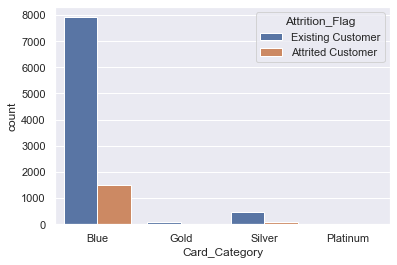

In [31]:
#Majority of the data in Card_category is using Blue Card


sns.set(style="darkgrid")
ax = sns.countplot(x="Card_Category", hue="Attrition_Flag", data=dataset)
plt.show()


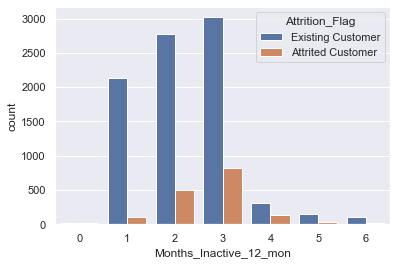

In [32]:
#Majority of the clients who abandoned the Bank were inactive 2-3 months

sns.set(style="darkgrid")
ax = sns.countplot(x="Months_Inactive_12_mon", hue="Attrition_Flag", data=dataset)
plt.show()


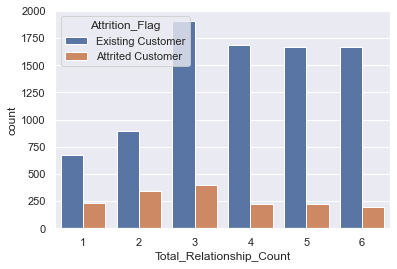

In [33]:
#Somehow the clients who held more products stayed in the Bank??

sns.set(style="darkgrid")
ax = sns.countplot(x="Total_Relationship_Count", hue="Attrition_Flag", data=dataset)
plt.show()


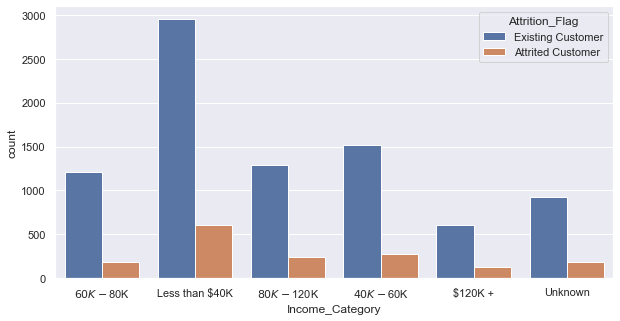

In [29]:
sns.set(style="darkgrid")
plt.figure(figsize=(10,5))
ax = sns.countplot(x="Income_Category", hue="Attrition_Flag", data=dataset)
plt.show()

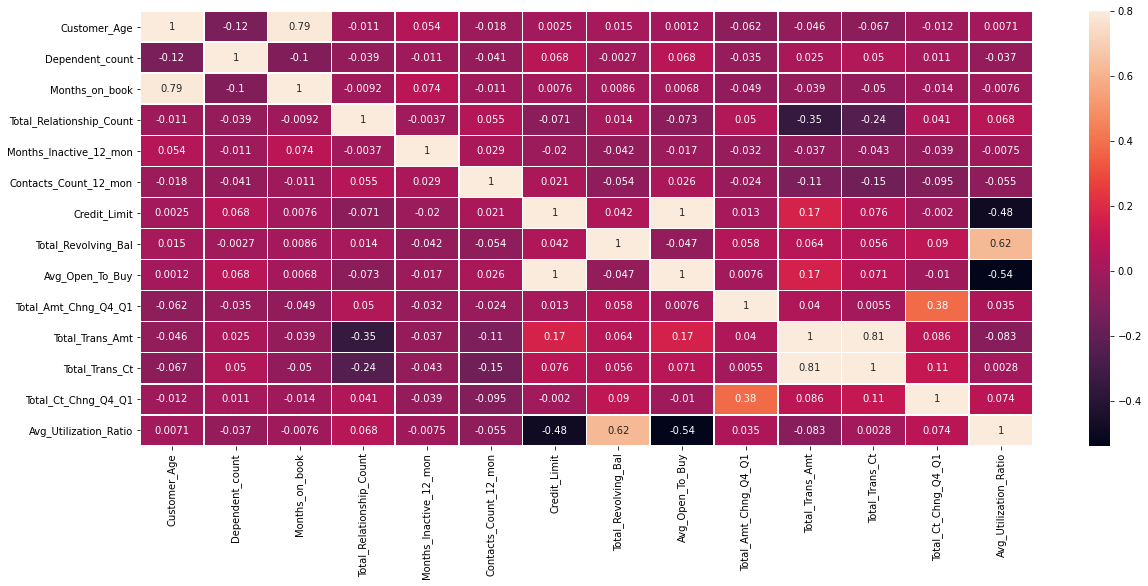

In [19]:
# Heatmap - correlation of features

correlation_matrix = dataset.corr()
top_corr_features = correlation_matrix.index
fig = plt.figure(figsize=(20,8))

sns.heatmap(dataset[top_corr_features].corr(), vmax=0.8, annot=True, linewidths=.5)
plt.show() 

# cmap = ['PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu','RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']

In [20]:
#calculate skew and sort
#The coefficient of skewness is a measure of asymmetry in the distribution.
#A positive skew indicates a longer tail to the right, while a negative skew indicates a longer tail to the left.
#A perfectly symmetric distribution, like the normal distribution, has a skew equal to zero.

skew_feats = dataset[numeric_columns].skew().sort_values(ascending=False)
skewness = pd.DataFrame({'skew':skew_feats})
skewness

,skew
Total_Ct_Chng_Q4_Q1,2.064031
Total_Trans_Amt,2.041003
Total_Amt_Chng_Q4_Q1,1.732063
Credit_Limit,1.666726
Avg_Open_To_Buy,1.661697
Avg_Utilization_Ratio,0.718008
Months_Inactive_12_mon,0.633061
Total_Trans_Ct,0.153673
Contacts_Count_12_mon,0.011006
Dependent_count,-0.020826


## 2. Feature Anaysis, Extraction & Selection
(you may need to perform feature selection after creating default models and compare to them)

## 3. Classification models
- classical classification models
- deep neural networks

## 4. Evaluation and comparisons, various metrics

## 5. Hyperparameter Optimization

## 6. Final evaluations and comparisons
- the best model - analyze it in details, evaluate it with different train/test splits. Is it robust enough

## 7. Discussion, Concusions, Future improvements
- which features are the most important
- how will you explain the model to the management of the bank
- how much benefit/improvement should the bank expect